# IMDB Sentiment Analysis (pg. 134)

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# keras.utils.set_random_seed(42)

In [2]:
# Keep the top 10,000 most frequently occuring words
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.imdb.load_data(
    num_words=10000
)

In [3]:
# 25,000 reviews as list of word indices
X_train_full.shape

(25000,)

In [4]:
# Map of word -> index
word_index = keras.datasets.imdb.get_word_index()

In [5]:
# Changes it so index -> word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
def decode_review(review):
    # Words are offset by 3 because 0, 1, 2 and "padding", "start of sequence" and "unknown"
    return " ".join([reverse_word_index.get(i - 3, "?") for i in review])

In [7]:
decode_review(X_train_full[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
# 1 means positive
y_train_full[0]

np.int64(1)

In [9]:
# In order to feed this data into a NN, need to vectorize by multi-hot encode
def multi_hot_encode(sequences, num_classes):
    # Creates ndarray of length = number of sequences, each with num_classes 0s
    # Ex:
    # [[0, 0, 0, ... 0],
    # [0, 0, 0, ... 0]]
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        # Fill the words with 1.0
        results[i][sequence] = 1.0
    return results

In [10]:
X_train_full_encoded = multi_hot_encode(X_train_full, num_classes=10000)
X_test_encoded = multi_hot_encode(X_test, num_classes=10000)

In [11]:
X_train_full_encoded[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train_full = y_train_full.astype("float32")
y_test = y_test.astype("float32")

In [13]:
# Input can be inferred during training
model = keras.Sequential(
    [
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [14]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
# Create train and validation sets
X_valid = X_train_full_encoded[:10000]
y_valid = y_train_full[:10000]

X_train = X_train_full_encoded[10000:]
y_train = y_train_full[10000:]

In [16]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=512,
    # Instead of manually splitting validation set, can use
    # validation_split = 0.2
    validation_data=(X_valid, y_valid),
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6859 - loss: 0.6294 - val_accuracy: 0.8583 - val_loss: 0.3885
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8913 - loss: 0.3177 - val_accuracy: 0.8826 - val_loss: 0.2953
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.1982 - val_accuracy: 0.8887 - val_loss: 0.2764
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9599 - loss: 0.1448 - val_accuracy: 0.8875 - val_loss: 0.2811
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9717 - loss: 0.1133 - val_accuracy: 0.8840 - val_loss: 0.2962
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9813 - loss: 0.0816 - val_accuracy: 0.8829 - val_loss: 0.3185
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9881 - loss: 0.0640 - val_accuracy: 0.8799 - val_loss: 0.3448
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9939 - loss: 0.0447 - val_accuracy: 0.8788 - val_loss

In [17]:
history_df = pd.DataFrame(history.history)
history_df.index += 1 # Start index from 1
history_df

,accuracy,loss,val_accuracy,val_loss
1,0.770667,0.552628,0.8583,0.388505
2,0.902000,0.288201,0.8826,0.295252
3,0.935133,0.196166,0.8887,0.276387
4,0.956933,0.144582,0.8875,0.281102
5,0.970133,0.110004,0.8840,0.296182
6,0.979267,0.083338,0.8829,0.318492
7,0.987933,0.062994,0.8799,0.344765
8,0.992400,0.046843,0.8788,0.372249
9,0.995667,0.034249,0.8760,0.401166
10,0.997667,0.025642,0.8747,0.431279


<Axes: title={'center': '[IMDB] Training and validation loss'}, xlabel='Epochs', ylabel='Loss'>

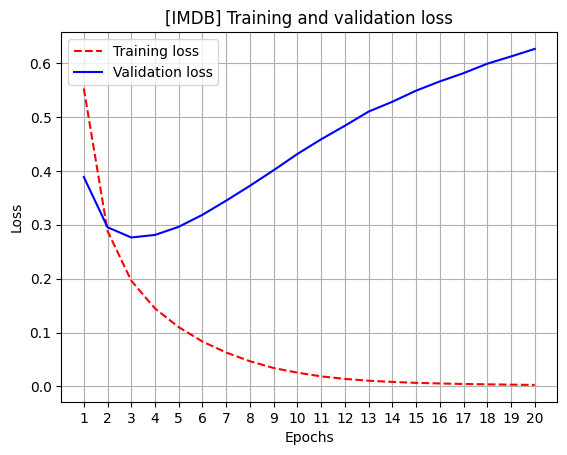

In [18]:
history_df.loc[:, ["loss", "val_loss"]].rename(
    columns={
        "loss": "Training loss",
        "val_loss": "Validation loss",
    }
).plot(
    grid=True,
    style=["r--", "b-"],
    title = "[IMDB] Training and validation loss",
    xticks = range(1, 21),
    xlabel = "Epochs",
    ylabel = "Loss"
)

<Axes: title={'center': '[IMDB] Training and validation accuracy'}, xlabel='Epochs', ylabel='Accuracy'>

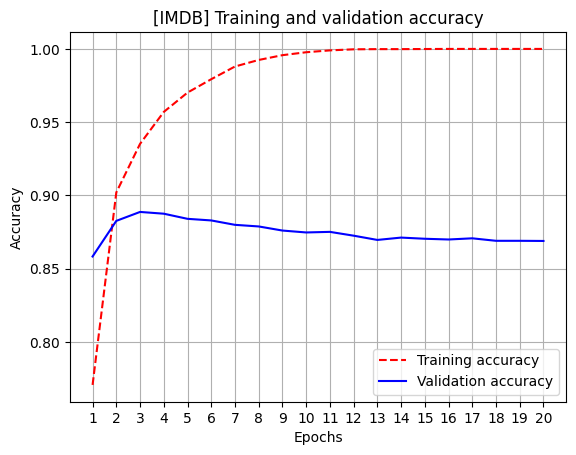

In [19]:
history_df.loc[:, ["accuracy", "val_accuracy"]].rename(
    columns={
        "accuracy": "Training accuracy",
        "val_accuracy": "Validation accuracy",
    }
).plot(
    grid=True,
    style=["r--", "b-"],
    title = "[IMDB] Training and validation accuracy",
    xticks = range(1, 21),
    xlabel = "Epochs",
    ylabel = "Accuracy"
)

In [20]:
results = model.evaluate(X_test_encoded, y_test)
results # [test loss, test accuracy]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8544 - loss: 0.6910


[0.6808909177780151, 0.8568000197410583]

From the loss graph, can be seen that after the 4th epoch, the model starts to overfit the training data (training loss cotinues to go down, but validation loss starts to go up).

In [21]:
# Retrain for 4 epochs only
model_4_epochs = keras.Sequential(
    [
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_4_epochs.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_4_epochs = model_4_epochs.fit(
    X_train,
    y_train,
    epochs=4,
    batch_size=512,
    validation_data=(X_valid, y_valid),
)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6320 - loss: 0.6569 - val_accuracy: 0.8479 - val_loss: 0.4880
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8861 - loss: 0.4122 - val_accuracy: 0.8847 - val_loss: 0.3335
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9195 - loss: 0.2636 - val_accuracy: 0.8892 - val_loss: 0.2881
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9416 - loss: 0.1916 - val_accuracy: 0.8909 - val_loss: 0.2747


In [22]:
results = model_4_epochs.evaluate(X_test_encoded, y_test)
results # [test loss, test accuracy]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.8810 - loss: 0.2941


[0.2934497594833374, 0.8828399777412415]

Stopping after 4 epochs results in a higher test accuracy